<a href="https://colab.research.google.com/github/shalinisanagavarapu/tuberculosis_diagnosis/blob/code/Tbdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Replace 'YOUR_FOLDER_ID' with the actual folder ID of your dataset
folder_id ='1DoyAcZj3ZvurJag4t2MrLv3VSFjUHq_F'

# Set the path for your dataset zip file on Google Drive
dataset_zip_path = '/content/drive/MyDrive/Tbdataset/archive.zip'

# Specify the destination directory to extract the dataset
extracted_path = '/content/dataset/'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the dataset from the zip file
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Check the contents of the extracted directory
print("Dataset has been uploaded and extracted to:", extracted_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset has been uploaded and extracted to: /content/dataset/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
import numpy as np

# Set the path to your dataset
dataset_path = '/content/dataset/TB_Chest_Radiography_Database'

# Set the image dimensions
img_height, img_width = 128, 128  # Adjust as needed

# Function to load and preprocess images
def preprocess_images(dataset_path, img_height, img_width):
    images = []
    labels = []

    # Assuming subdirectories in the dataset path represent different classes
    classes = os.listdir(dataset_path)

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                # Check if the file is an image
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        # Load and preprocess each image
                        image = cv2.imread(image_path)
                        image = cv2.resize(image, (img_height, img_width))
                        image = image.astype('float32') / 255.0  # Normalize pixel values
                        images.append(image)
                        labels.append(class_name)
                    except Exception as e:
                        print(f"Error processing image {image_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Load and preprocess the images
images, labels = preprocess_images(dataset_path, img_height, img_width)

# Shuffle the data
images, labels = shuffle(images, labels, random_state=42)

# Convert string labels to integer labels
label_to_index = {label: idx for idx, label in enumerate(set(labels))}
integer_labels = np.array([label_to_index[label] for label in labels])

# Split the dataset into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(images, integer_labels, test_size=0.2, random_state=21)

    # Create a CNN model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compile the model
    model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    # Data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Train the model
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

    # Save the model
    model.save('tb_detection_model128.h5')

except ValueError as e:
    print(f"Error splitting the dataset: {str(e)}")


Epoch 1/10
105/105 [==============================] - 22s 143ms/step - loss: 0.3580 - accuracy: 0.8747 - val_loss: 0.2177 - val_accuracy: 0.9202
Epoch 2/10
105/105 [==============================] - 17s 160ms/step - loss: 0.3149 - accuracy: 0.8696 - val_loss: 0.2556 - val_accuracy: 0.8643
Epoch 3/10
105/105 [==============================] - 14s 136ms/step - loss: 0.2845 - accuracy: 0.8848 - val_loss: 0.1524 - val_accuracy: 0.9357
Epoch 4/10
105/105 [==============================] - 14s 136ms/step - loss: 0.2050 - accuracy: 0.9140 - val_loss: 0.1328 - val_accuracy: 0.9345
Epoch 5/10
105/105 [==============================] - 15s 146ms/step - loss: 0.1956 - accuracy: 0.9152 - val_loss: 0.1500 - val_accuracy: 0.9238
Epoch 6/10
105/105 [==============================] - 14s 136ms/step - loss: 0.2135 - accuracy: 0.9089 - val_loss: 0.1415 - val_accuracy: 0.9286
Epoch 7/10
105/105 [==============================] - 14s 135ms/step - loss: 0.1792 - accuracy: 0.9247 - val_loss: 0.1476 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the trained model
model = load_model('/content/tb_detection_model128o.h5')

# Function to preprocess a new image
def preprocess_image(image_path, img_height, img_width):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (img_height, img_width))
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Path to the new image you want to test
new_image_path = '/content/Normal-1.png'

# Preprocess the new image
new_image = preprocess_image(new_image_path, img_height, img_width)

# Make predictions
predictions = model.predict(new_image)

# Interpret the predictions (binary classification example)
threshold = 0.3  # Adjust as needed
predicted_class = 1 if predictions[0, 0] > threshold else 0

print(f"Predicted Class: {predicted_class}")

1/1 [==============================] - 0s 69ms/step
Predicted Class: 0


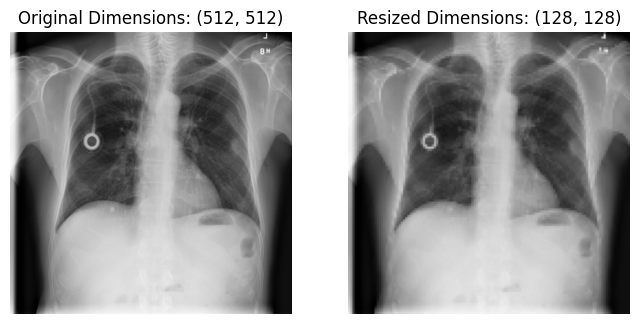

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Set the path to your dataset
dataset_path = '/content/dataset/TB_Chest_Radiography_Database'

# Function to pick a random image from the dataset
def pick_random_image(dataset_path):
    classes = os.listdir(dataset_path)
    class_name = random.choice(classes)
    class_path = os.path.join(dataset_path, class_name)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    return image_path

# Get a random image path
image_path_to_test = pick_random_image(dataset_path)

# Load the original image
original_image = cv2.imread(image_path_to_test)
original_dimensions = original_image.shape[:2]

# Set the desired dimensions
desired_height, desired_width = 128, 128

# Resize the image
resized_image = cv2.resize(original_image, (desired_height, desired_width))
resized_dimensions = resized_image.shape[:2]

# Display the original and resized images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title(f"Original Dimensions: {original_dimensions}")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Resized Dimensions: {resized_dimensions}")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [ ]:
# Integration Test

# Set the image dimensions
expected_img_height, expected_img_width = 128, 128  # The expected dimensions

# Check preprocessing function
assert img_height == expected_img_height and img_width == expected_img_width, \
    f"Preprocessing dimensions do not match the expected dimensions ({expected_img_height}, {expected_img_width})"

# Check model input shape
assert model.layers[0].input_shape[1:3] == (expected_img_height, expected_img_width), \
    f"Model input shape does not match the expected dimensions ({expected_img_height}, {expected_img_width})"

print("Integration Test Passed!")


Integration Test Passed!


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Set the path to your dataset
dataset_path = '/content/dataset/TB_Chest_Radiography_Database'

# Revised function to get a random image path and true label from the dataset
def get_random_image_and_label(dataset_path):
    # Ensure the provided path is a directory
    if not os.path.isdir(dataset_path):
        raise NotADirectoryError(f"The provided path '{dataset_path}' is not a directory.")

    # Get a random class
    classes = os.listdir(dataset_path)
    class_name = random.choice(classes)

    # Ensure the selected class path is a directory
    class_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_path):
        raise NotADirectoryError(f"The path '{class_path}' is not a directory.")

    # Get a random image from the selected class
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)

    return image_path, class_name

# Get a random image and true label
random_image_path, true_label = get_random_image_and_label(dataset_path)

# Load and preprocess the random image
random_image = cv2.imread(random_image_path)
random_image = cv2.resize(random_image, (expected_img_height, expected_img_width))
random_image = random_image.astype('float32') / 255.0

# Expand dimensions to match model input shape
random_image = np.expand_dims(random_image, axis=0)

# Make a prediction using the trained model
predicted_class_prob = model.predict(random_image)
predicted_class = "Normal" if predicted_class_prob < 0.5 else "TB"  # Assuming binary classification

# Print debugging information
print(f"Predicted Probability: {predicted_class_prob}")
print(f"Predicted Class: {predicted_class}")
print(f"True Label: {true_label}")


print("Functional Test Passed!")


1/1 [==============================] - 0s 20ms/step
Predicted Probability: [[0.9989907]]
Predicted Class: TB
True Label: Tuberculosis
Functional Test Passed!
